In [ ]:
#Source: https://github.com/ahmadmardeni1/Stock-price-predection-using-Python

## **Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## **Loading Our Dataset**

In [ ]:
from google.colab import files

In [ ]:
dataset = files.upload()


Saving TSLA.csv to TSLA.csv


In [ ]:
df = pd.read_csv('TSLA.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000
1,2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000
2,2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500
3,2010-07-07,3.280000,3.326000,2.996000,3.160000,3.160000,34608500
4,2010-07-08,3.228000,3.504000,3.114000,3.492000,3.492000,38557000
...,...,...,...,...,...,...,...
2387,2019-12-24,83.671997,85.094002,82.538002,85.050003,85.050003,40273500
2388,2019-12-26,85.582001,86.695999,85.269997,86.188004,86.188004,53169500
2389,2019-12-27,87.000000,87.061996,85.222000,86.075996,86.075996,49728500
2390,2019-12-30,85.758003,85.800003,81.851997,82.940002,82.940002,62932000


## **Feature Extraction**

 The number of the trading days and the columns: 

In [ ]:
df.shape

(2392, 7)

In [ ]:
df = df['Open'].values
df = df.reshape(-1, 1)

After extracting one column:


In [ ]:
df.shape

(2392, 1)

In [ ]:
dataset_train = np.array(df[:int(df.shape[0]*0.8)])
dataset_test = np.array(df[int(df.shape[0]*0.8):])
print(dataset_train.shape)
print(dataset_test.shape)

(1913, 1)
(479, 1)


Importing our model:

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout

Scaling data:

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(dataset_train)
dataset_train[:5]

array([[0.0239104 ],
       [0.01851302],
       [0.01041695],
       [0.00070166],
       [0.        ]])

In [ ]:
dataset_test = scaler.transform(dataset_test)
dataset_test[:5]

array([[0.8340845 ],
       [0.87127243],
       [0.88293085],
       [0.81983541],
       [0.80958041]])

In [ ]:
def create_dataset(df):
    x = []
    y = []
    for i in range(50, df.shape[0]):
        x.append(df[i-50:i, 0])
        y.append(df[i, 0])
    x = np.array(x)
    y = np.array(y)
    return x,y 

Creating training and testing datasets:

In [ ]:
x_train, y_train = create_dataset(dataset_train)
x_test, y_test = create_dataset(dataset_test)

Creating our LSTM model:

In [ ]:
model = Sequential()
model.add(LSTM(units=96, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=96, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96))
model.add(Dropout(0.2))
model.add(Dense(units=1))

Reshape features for the LSTM layer:

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam')

Start the training:

In [ ]:
model.fit(x_train, y_train, epochs=5, batch_size=32)
model.save('stock_prediction.h5')

Epoch 1/5
59/59 [==============================] - 15s 172ms/step - loss: 0.0133
Epoch 2/5
59/59 [==============================] - 10s 169ms/step - loss: 0.0033
Epoch 3/5
59/59 [==============================] - 10s 170ms/step - loss: 0.0036
Epoch 4/5
59/59 [==============================] - 10s 171ms/step - loss: 0.0030
Epoch 5/5
59/59 [==============================] - 10s 169ms/step - loss: 0.0030


In [ ]:
model = load_model('stock_prediction.h5')

## **Results visualization**

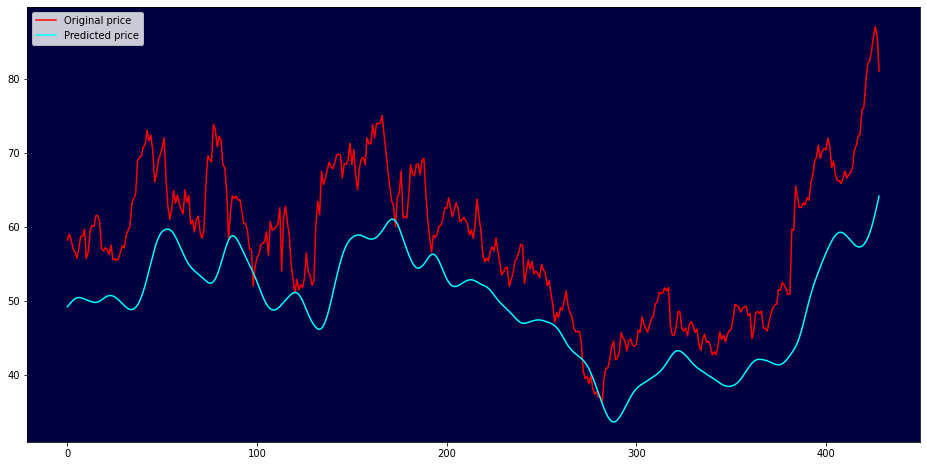

In [ ]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

fig, ax = plt.subplots(figsize=(16,8))
ax.set_facecolor('#000041')
ax.plot(y_test_scaled, color='red', label='Original price')
plt.plot(predictions, color='cyan', label='Predicted price')
plt.legend()